Title: Enhancing the prediction of seeds using Support Vector Machine (SVM) and Naive Bayes.

Objective: The objective of this study is to apply SVM and Naive Bayes to the Seeds dataset to improve prediction accuracy and provide valuable insights.

Theory:

SVM (Support Vector Machine):

SVM is a supervised learning algorithm that can be used for both classification and regression tasks. It works by finding a hyperplane in the feature space that separates the data points into two classes with the largest margin possible. The hyperplane is defined by a set of support vectors, which are the data points that lie closest to the hyperplane.
To classify a new data point, SVM first projects the data point into the feature space. Then, it finds the distance between the data point and the hyperplane. If the distance is less than the margin, the data point is classified as belonging to the class that is on the same side of the hyperplane as the support vectors. Otherwise, the data point is classified as belonging to the other class.

Naive Bayes:

Naive Bayes is a probabilistic classifier that is based on Bayes' theorem. It works by assuming that the features of the data are independent of each other. This assumption is often not true, but it can still be an effective classifier for many tasks.
To classify a new data point, Naive Bayes first calculates the probability of each class given the values of the features. Then, it classifies the data point to the class with the highest probability.

Conclusion:

SVM and Naive Bayes are two popular classification algorithms that can be used to classify the seeds dataset. SVM is a more powerful classifier, but it can be computationally expensive to train. Naive Bayes is a simpler and more efficient classifier, but it can be sensitive to the assumption of independence between the features.



In [ ]:
# preprocessing includes collection,cleaning,transforming,splitting
#training includes model selection, ml,testing,accuracy
#remodeling for better result

In [ ]:
#step 1: importing libararies
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt #--->data visualization (it is a library which returns something)
%matplotlib inline
print("Imported!")

Imported!


In [ ]:
#collection of data --> using pandas

file=pd.read_csv("/content/seeds_dataset (2).csv")

file.head(20)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Unnamed: 7,Unnamed: 8
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,NaN,NaN
1,14.88,14.57,0.8811,NaN,3.333,1.018,4.956,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,NaN,NaN
3,13.84,13.94,0.8955,5.324,NaN,2.259,4.805,NaN,NaN
4,NaN,NaN,0.9034,5.658,3.562,NaN,5.175,NaN,NaN
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,NaN,NaN
6,NaN,14.49,NaN,5.563,3.259,3.586,5.219,NaN,NaN
7,14.11,14.10,0.8911,5.420,3.302,2.700,NaN,NaN,NaN
8,16.63,15.46,0.8747,6.053,3.465,NaN,5.877,NaN,NaN
9,16.44,NaN,0.8880,5.884,3.505,1.969,5.533,NaN,NaN


In [ ]:
#finding for missing values
file.isna().sum()

Area                        16
Perimeter                   14
Compactness                 11
Length of kernel            15
Width of kernel             11
Asymmetry coefficient       10
Length of kernel groove     11
Unnamed: 7                 208
Unnamed: 8                 209
dtype: int64

In [ ]:
#look for datatypes
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     194 non-null    float64
 1   Perimeter                196 non-null    float64
 2   Compactness              199 non-null    float64
 3   Length of kernel         195 non-null    float64
 4   Width of kernel          199 non-null    float64
 5   Asymmetry coefficient    200 non-null    float64
 6   Length of kernel groove  199 non-null    float64
 7   Unnamed: 7               2 non-null      object 
 8   Unnamed: 8               1 non-null      object 
dtypes: float64(7), object(2)
memory usage: 14.9+ KB
None


In [ ]:
file=file.drop("Unnamed: 7",axis=1)
file=file.drop("Unnamed: 8",axis=1)

In [ ]:
file

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,NaN,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,NaN,2.259,4.805
4,NaN,NaN,0.9034,5.658,3.562,NaN,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,NaN,5.140,NaN,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,NaN
208,11.84,13.21,0.8521,NaN,2.836,3.598,5.044


In [ ]:
file

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,NaN,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,NaN,2.259,4.805
4,NaN,NaN,0.9034,5.658,3.562,NaN,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,NaN,5.140,NaN,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,NaN
208,11.84,13.21,0.8521,NaN,2.836,3.598,5.044


In [ ]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     194 non-null    float64
 1   Perimeter                196 non-null    float64
 2   Compactness              199 non-null    float64
 3   Length of kernel         195 non-null    float64
 4   Width of kernel          199 non-null    float64
 5   Asymmetry coefficient    200 non-null    float64
 6   Length of kernel groove  199 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None


In [ ]:
#WE have missing values and all numbers in dataset
#now removing missing values
#IMPUTING-->filling missing values by number.

file=file.fillna(file.mean()) #-->filling the file data means filling NaN with the mean

In [ ]:
file.head(20)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.260000,14.840000,0.871000,5.763000,3.312000,2.221000,5.22000
1,14.880000,14.570000,0.881100,5.630097,3.333000,1.018000,4.95600
2,14.290000,14.090000,0.905000,5.291000,3.337000,2.699000,4.82500
3,13.840000,13.940000,0.895500,5.324000,3.260231,2.259000,4.80500
4,14.888454,14.550918,0.903400,5.658000,3.562000,3.712436,5.17500
5,14.380000,14.210000,0.895100,5.386000,3.312000,2.462000,4.95600
6,14.888454,14.490000,0.870873,5.563000,3.259000,3.586000,5.21900
7,14.110000,14.100000,0.891100,5.420000,3.302000,2.700000,5.40595
8,16.630000,15.460000,0.874700,6.053000,3.465000,3.712436,5.87700
9,16.440000,14.550918,0.888000,5.884000,3.505000,1.969000,5.53300


In [ ]:
file.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
dtype: int64

In [ ]:
# done with preprocessing

In [ ]:
#now training part

# vertical split(betw x and y)-->splitting data into features(i/p)[what should u learn to predict the o/p]
#and labels(o/p)[what u want to do]

x=file.drop("Area",axis=1)
y=file["Area"]

x

,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,14.840000,0.871000,5.763000,3.312000,2.221000,5.22000
1,14.570000,0.881100,5.630097,3.333000,1.018000,4.95600
2,14.090000,0.905000,5.291000,3.337000,2.699000,4.82500
3,13.940000,0.895500,5.324000,3.260231,2.259000,4.80500
4,14.550918,0.903400,5.658000,3.562000,3.712436,5.17500
...,...,...,...,...,...,...
205,13.200000,0.878300,5.137000,2.981000,3.631000,4.87000
206,12.880000,0.870873,5.140000,3.260231,4.325000,5.00300
207,13.660000,0.888300,5.236000,3.232000,8.315000,5.40595
208,13.210000,0.852100,5.630097,2.836000,3.598000,5.04400


In [ ]:
y

0      15.260000
1      14.880000
2      14.290000
3      13.840000
4      14.888454
         ...    
205    12.190000
206    11.230000
207    13.200000
208    11.840000
209    12.300000
Name: Area, Length: 210, dtype: float64

In [ ]:
#horizontal split done using sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train

,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
135,14.660000,0.8990,5.477,3.465000,3.600000,5.439
64,13.570000,0.8716,5.262,3.026000,1.176000,4.782
98,16.260000,0.8637,6.271,3.512000,2.853000,6.273
45,14.040000,0.8794,5.376,3.155000,1.560000,4.961
76,15.910000,0.8599,6.064,3.403000,3.824000,5.922
...,...,...,...,...,...,...
112,16.310000,0.9035,6.183,3.902000,2.109000,5.924
105,16.290000,0.8917,6.037,3.260231,2.553000,5.879
111,16.720000,0.8716,6.303,3.791000,3.678000,5.965
4,14.550918,0.9034,5.658,3.562000,3.712436,5.175


In [ ]:
x_test

,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
70,15.980000,0.867300,6.191,3.561000,4.076000,6.06000
50,14.400000,0.875100,5.585,3.272000,3.712436,5.14400
131,16.320000,0.894200,6.144,3.260231,2.908000,5.94900
143,13.320000,0.865200,5.224,2.967000,5.469000,5.22100
8,15.460000,0.874700,6.053,3.465000,3.712436,5.87700
83,16.740000,0.877900,6.384,3.772000,1.472000,6.27300
153,13.040000,0.826600,5.220,2.693000,3.332000,5.00100
88,17.210000,0.898900,6.573,4.033000,5.780000,6.23100
41,13.850000,0.885200,5.351,3.158000,2.249000,5.17600
44,14.540000,0.898600,5.579,3.462000,3.128000,5.18000


In [ ]:
y_train

135    15.380000
64     12.780000
98     14.888454
45     13.800000
76     17.320000
         ...    
112    19.130000
105    18.830000
111    19.380000
4      14.888454
89     14.888454
Name: Area, Length: 168, dtype: float64

In [ ]:
y_test

70     17.630000
50     14.430000
131    18.940000
143    12.220000
8      16.630000
83     19.570000
153    11.180000
88     21.180000
41     14.888454
44     15.110000
124    15.990000
128    20.160000
164    11.140000
104    18.950000
29     13.450000
200    12.380000
102    19.460000
113    19.140000
141    13.320000
21     14.110000
91     18.760000
37     17.080000
207    13.200000
51     15.780000
90     20.100000
40     13.540000
19     12.720000
114    20.970000
42     13.160000
38     14.800000
26     13.020000
205    12.190000
180    11.410000
43     15.500000
97     18.980000
121    18.140000
72     17.260000
181    12.460000
77     20.710000
177    10.740000
52     14.490000
160    12.540000
Name: Area, dtype: float64

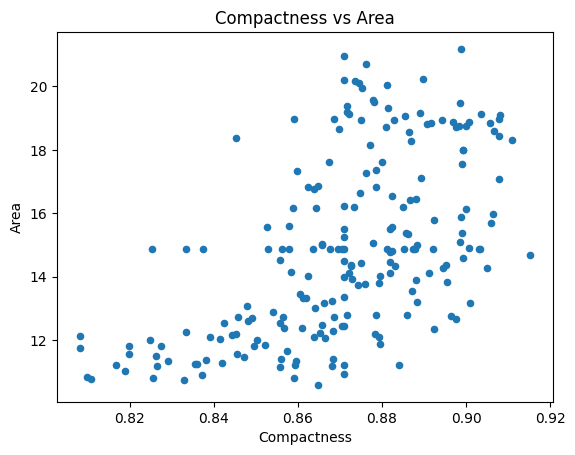

In [ ]:
file.plot("Compactness","Area",title="Compactness vs Area", xlabel = "Compactness", ylabel="Area",kind="scatter");

In [ ]:
#training the model on training data
from sklearn.ensemble import RandomForestRegressor #-->just for creating model not part of training
model=RandomForestRegressor()# for model creating

In [ ]:
#naive bayes --> classification
from sklearn import naive_baye
model.fit(x_train,y_train)#-->model.fit : training model on training data of x and y
model.score(x_test,y_test)#-->model.score : testing model on training data of x and y

0.8033787975692283

In [ ]:
#svm --> classification
from sklearn import svm
model.fit(x_train,y_train)#-->model.fit : training model on training data of x and y
model.score(x_test,y_test)#-->model.score : testing model on training data of x and y

0.8793437747215025